# Chapter 07 - Exercises

### Exercise 7.1

**Q**

In Chapter 6 we noted that the Monte Carlo error can be written as the sum of TD errors (6.6) if the value estimates don’t change from step to step. Show that the n-step error used in (7.2) can also be written as a sum TD errors (again if the value estimates don’t change) generalizing the earlier result.

**A**

The TD error is defined as:

\begin{align*}
\delta_t \doteq R_{t+1} + \gamma V(S_{t+1}) - V(S_t)
\end{align*}

Equation 6.6 is:

\begin{align*}
G_t - V(S_t) &= R_{t+1} + \gamma G_{t+1} - V(S_t) + \gamma V(S_{t+1}) - \gamma V(S_{t+1}) \\
&= \delta_t + \gamma (G_{t+1} - V(S_{t+1})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 (G_{t+2} - V(S_{t+2})) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (G_T - V(S_T)) \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{T-t-1} \delta_{T-1} + \gamma^{T-t} (0 - 0) \\
&= \sum_{k=t}^{T-1} \gamma^{k-t} \delta_k
\end{align*}

Equation 7.2 is:

\begin{align*}
V_{t+n} (S_t) \doteq V_{t+n-1} (S_t) + \alpha[G_{t:t+n} - V_{t+n-1} (S_t)], \quad 0 \leq t \lt T
\end{align*}

with:

\begin{align*}
G_{t:t+n} \doteq R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n V_{t+n-1} (S_{t+n})
\end{align*}

The n-step TD error in 7.2 is the expression whose difference is multiplied by $\alpha$ to be added to the old value and give the new (estimated) state value:

\begin{align*}
G_{t:t+n} - V_{t+n-1} (S_t) &= R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n V_{t+n-1} (S_{t+n}) - V_{t+n-1} (S_t) \\
&= R_{t+1} + \gamma [R_{t+2} + ... + \gamma^{n-2} R_{t+n} + \gamma^{n-1} V_{t+n-1} (S_{t+n})] - V_{t+n-1} (S_t) \\
&= R_{t+1} + \gamma G_{t+1:t+n} - V_{t+n-1} (S_t) \\
&= R_{t+1} + \gamma [G_{t+1:t+n} + V_{t+n-1} (S_{t+1}) - V_{t+n-1} (S_{t+1})] - V_{t+n-1} (S_t) \\
&= [R_{t+1} + \gamma V_{t+n-1} (S_{t+1}) - V_{t+n-1} (S_t)] + \gamma [G_{t+1:t+n} - V_{t+n-1} (S_{t+1})]
\end{align*}

Assuming that the value estimates don’t change, we have:

\begin{align*}
V_k = V, \quad \forall k
\end{align*}

and:

\begin{align*}
G_{t:t+n} - V_{t+n-1} (S_t) = G_{t:t+n} - V (S_t)
\end{align*}

So:

\begin{align*}
G_{t:t+n} - V_{t+n-1} (S_t) &= [R_{t+1} + \gamma V_{t+n-1} (S_{t+1}) - V_{t+n-1} (S_t)] + \gamma [G_{t+1:t+n} - V_{t+n-1} (S_{t+1})] \\
G_{t:t+n} - V (S_t) &= [R_{t+1} + \gamma V (S_{t+1}) - V (S_t)] + \gamma [G_{t+1:t+n} - V (S_{t+1})] \\
&= \delta_t + \gamma [G_{t+1:t+n} - V (S_{t+1})] \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 [G_{t+2:t+n} - V (S_{t+2})] \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{n-2} \delta_{t+n-2} + \gamma^{n-1} [G_{t+n-1:t+n} - V (S_{t+n-1})] \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{n-2} \delta_{t+n-2} + \gamma^{n-1} [R_{t+n} + \gamma V_{t+n-1} (S_{t+n}) - V (S_{t+n-1})] \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{n-2} \delta_{t+n-2} + \gamma^{n-1} [R_{t+n} + \gamma V(S_{t+n}) - V (S_{t+n-1})] \\
&= \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} + ... + \gamma^{n-2} \delta_{t+n-2} + \gamma^{n-1} \delta_{t+n-1} \\
&= \sum_{k=t}^{t+n-1} \gamma^{k-t} \delta_k
\end{align*}

It's good to take into account that for a final time-step T, the equation corresponds to the Monte Carlo error (t + n = T):

\begin{align*}
G_{t:t+n} - V (S_t) &= \sum_{k=t}^{t+n-1} \gamma^{k-t} \delta_k \\
G_{t:T} - V (S_t) &= \sum_{k=t}^{T-1} \gamma^{k-t} \delta_k
\end{align*}

It's also importante to note that the value estimates were considered to not change, but in a real scenario it's expected that they change (see exercise 6.1).

### Exercise 7.2 (programming) 

**Q**

With an n-step method, the value estimates do change from step to step, so an algorithm that used the sum of TD errors (see previous exercise) in place of the error in (7.2) would actually be a slightly different algorithm. Would it be a better algorithm or a worse one? Devise and program a small experiment to answer this question empirically.

**A**

The error of n-step TD is:

\begin{align*}
G_{t:t+n} - V_{t+n-1} (S_t)
\end{align*}

The update of n-step TD is:

\begin{align*}
V_{t+n} (S_t) \doteq V_{t+n-1} (S_t) + \alpha[G_{t:t+n} - V_{t+n-1} (S_t)], \quad 0 \leq t \lt T
\end{align*}

Using the sum of TD errors in place of the error, the update would be:

\begin{align*}
V_{t+n} (S_t) \doteq V_{t+n-1} (S_t) + \alpha \left[\sum_{k=t}^{t+n-1} \gamma^{k-t} \delta_k \right], \quad 0 \leq t \lt T
\end{align*}

For the small experiment it will be used the random walk experiment and compare the state values across the epochs for the 2 cases, considering the sum of the absolute differences between each state value and the optimal state value. The policy does not matter because it's an MRP, so there's no actions to be taken (for the sake of implementation, it can also be considered to have only one action).

In [24]:
import typing
import matplotlib.pyplot as plt
from numpy.random import MT19937, Generator

def random_generator(seed: int | None = None):
    bg = MT19937(seed)
    rg = Generator(bg)
    return rg

class BaseEnv():
    def __init__(
        self,
        states: list[int],
        actions: list[int],
        terminal_states: set[int] = set(),
    ):
        num_states = len(states)
        num_actions = len(actions)

        assert num_states > 0
        assert num_actions > 0

        self.states = states
        self.actions = actions
        self.num_states = num_states
        self.num_actions = num_actions
        self.terminal_states = terminal_states

    def reset(self, seed: int | None) -> int:
        raise NotImplementedError()

    def step(self, action: int) -> tuple[int, float, bool, bool]:
        raise NotImplementedError()

class TDEvalParams:
    def __init__(
        self,
        env: BaseEnv,
        v: list[float],
        policy: typing.Callable[[int], int],
        n: int,
        alpha=0.5,
        gamma=0.9,
        seed: int | None = None,
    ):
        self.env = env
        self.v = v
        self.policy = policy
        self.n = n
        self.alpha = alpha
        self.gamma = gamma
        self.seed = seed

def evaluate(
    env: BaseEnv,
    optimal_v: list[float],
    policy: typing.Callable[[int], int],
    eval_episode: typing.Callable[[TDEvalParams], list[float]],
    n: int,
    episodes: int,
    alpha=0.5,
    gamma=0.9,
    seed: int | None = None,
):
    v = [0.0] * env.num_states
    diffs: list[float] = []
    rg = random_generator(seed)

    for _ in range(episodes):
        inner_seed = rg.integers(1e9)
        params = TDEvalParams(
            env=env,
            v=v,
            policy=policy,
            n=n,
            alpha=alpha,
            gamma=gamma,
            seed=inner_seed,
        )
        v = eval_episode(params)
        diff = sum(abs(v[i] - optimal_v[i]) for i in range(len(v)))
        diffs.append(diff)

    return diffs, v

LEFT = 0
RIGHT = 1

class RandomWalkEnv(BaseEnv):
    def __init__(
        self,
        max_steps: int | None = None,
        with_actions=False,
    ):
        states = list(range(7))
        actions = (
            [0, 1] # left/right
            if with_actions
            else [0] # there's no action (or equivalently, only 1 action)
        )

        super().__init__(
            states=states,
            actions=actions,
            terminal_states=set([0, len(states) - 1])
        )

        self.max_steps = max_steps
        self.steps = 0
        self.state: int | None = None
        self.rg = random_generator()
        self.with_actions = with_actions

    def reset(self, seed: int | None) -> int:
        state = 3
        self.steps = 0
        self.state = state
        self.rg = random_generator(seed)
        return state

    def step(self, action: int) -> tuple[int, float, bool, bool]:
        max_steps = self.max_steps
        steps = self.steps
        state = self.state
        assert state is not None
        assert steps < max_steps

        steps += 1
        move = (action*2 - 1) if self.with_actions else self.rg.choice([1, -1])
        next_state = state + move
        reward = 1 if next_state == self.num_states - 1 else 0
        terminated = next_state in self.terminal_states
        truncated = (not terminated) and (max_steps is not None) and (steps >= max_steps)

        self.steps = steps
        self.state = next_state

        return next_state, reward, terminated, truncated

def evaluate_random_walk(
    title: str,
    n: int,
    cases: list[(str, typing.Callable[[TDEvalParams], list[float]])],
    policy: typing.Callable[[int], int] = lambda state: 0,
):
    env = RandomWalkEnv(max_steps=500)
    optimal_v = [0] + [i/6 for i in range(1, 6)] + [0]
    episodes = 500
    alpha = 0.01
    gamma = 1
    seed = 0

    results: list[tuple[list[float], list[float]]] = [
        evaluate(
            env=env,
            optimal_v=optimal_v,
            policy=policy,
            eval_episode=eval_episode,
            n=n,
            episodes=episodes,
            alpha=alpha,
            gamma=gamma,
            seed=seed,
        )
        for _, eval_episode in cases
    ]
    names = [name for name, _ in cases]
    diffs_list = [diffs for diffs, _ in results]
    v_list = [v for _, v in results]

    for name, v in zip(names, v_list):
        print(f'[n={n}] [{name}] v={v}')

    print('-' * 80)
    plt.figure()

    for name, diffs in zip(names, diffs_list):
        plt.plot(diffs, label=f'n-step error {name}')

    plt.title(f'Algorithms Comparation (n={n}) - {title}')
    plt.xlabel('Episodes')
    plt.ylabel('Error (compared to v*)')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.plot()

[n=1] [default] v=[0.0, 0.052529082433901295, 0.1567524587217102, 0.28240848765955806, 0.4623659613000425, 0.7155369566434888, 0.0]
[n=1] [sum_of_errors] v=[0.0, 0.052529082433901295, 0.1567524587217102, 0.28240848765955806, 0.4623659613000425, 0.7155369566434888, 0.0]
--------------------------------------------------------------------------------
[n=2] [default] v=[0.0, 0.09943655988268099, 0.2813856298254885, 0.3971575373579224, 0.6092446089905663, 0.7740071561992523, 0.0]
[n=2] [sum_of_errors] v=[0.0, 0.29362958022113395, 0.2813856298254885, 0.653387517772934, 0.6092446089905663, 1.193544229418821, 0.0]
--------------------------------------------------------------------------------
[n=3] [default] v=[0.0, 0.13003236371342072, 0.3023261465941956, 0.466005151056779, 0.6470413169496815, 0.8186834433889297, 0.0]
[n=3] [sum_of_errors] v=[0.0, 0.5375827019340665, 0.704050363594045, 0.7585739133209369, 1.1267383950290022, 1.3343250249866618, 0.0]
-----------------------------------------

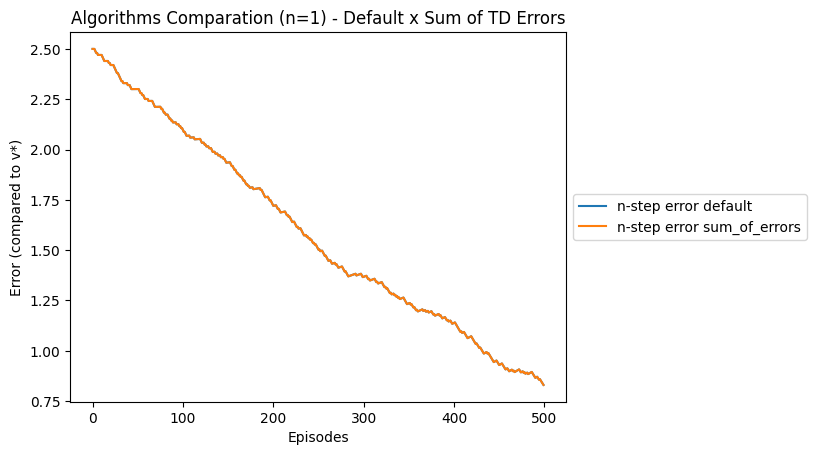

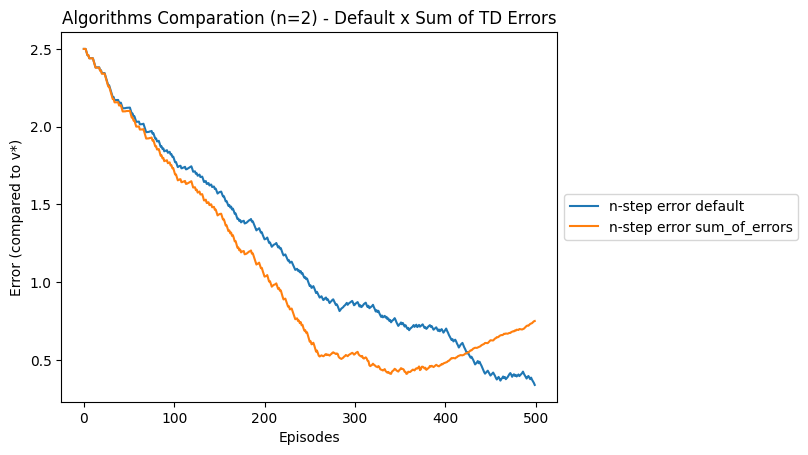

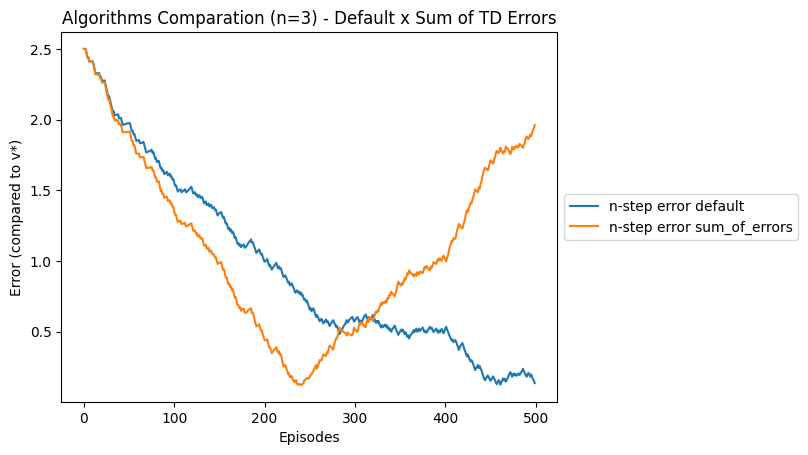

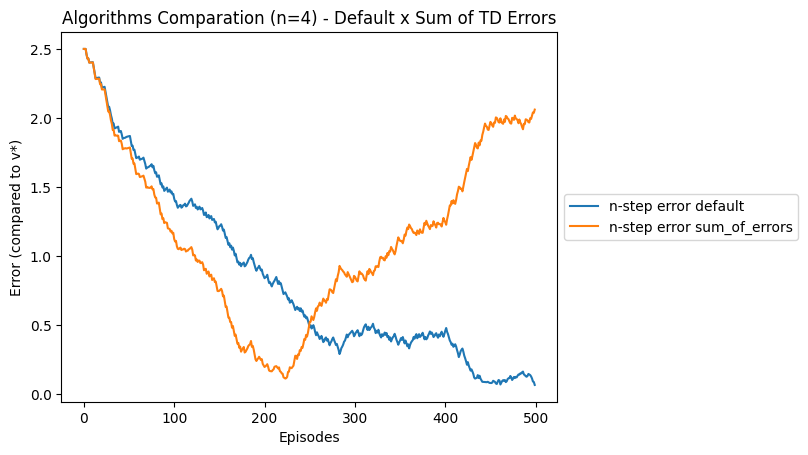

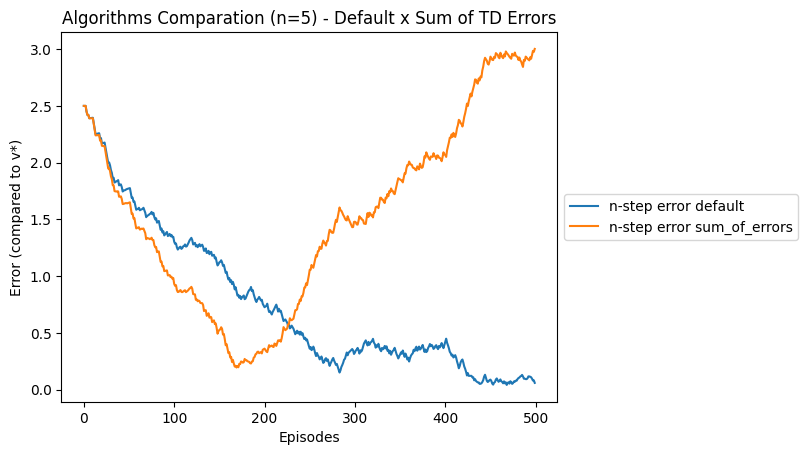

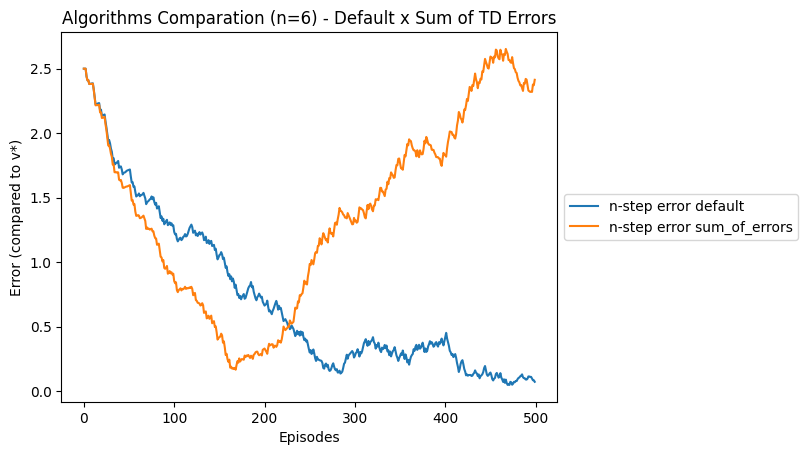

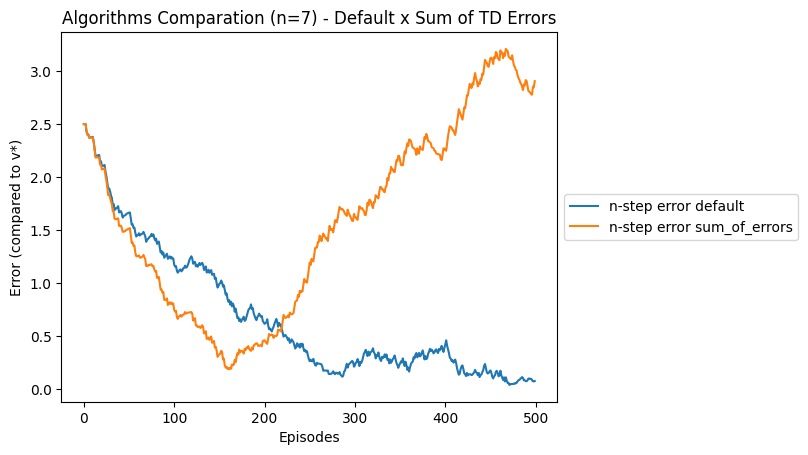

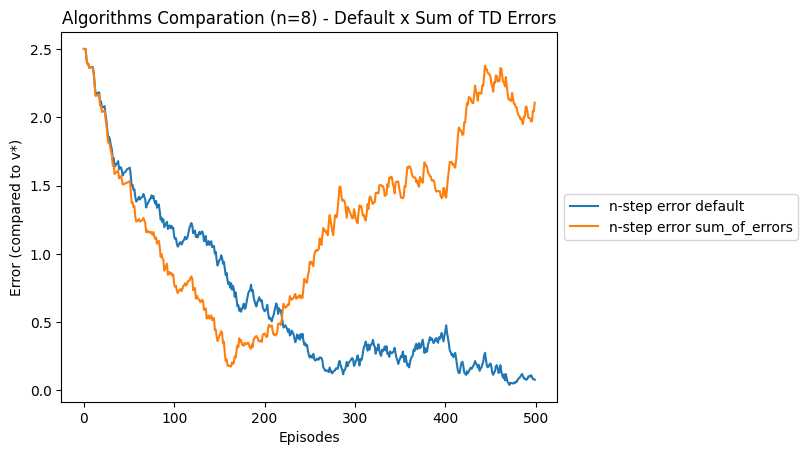

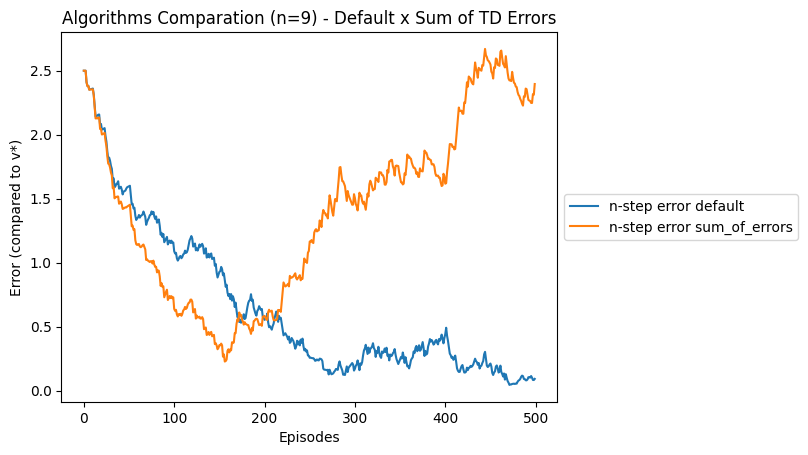

In [25]:
import matplotlib.pyplot as plt

def n_step_td_eval(params: TDEvalParams, sum_td_errors=False):
    env = params.env
    v = params.v
    policy = params.policy
    n = params.n
    alpha = params.alpha
    gamma = params.gamma
    seed = params.seed

    s_steps = [0] * (n+1)
    r_steps = [0] * (n+1)

    state = env.reset(seed)
    s_steps[0] = state
    T: int | None = None
    t = 0
    tau: int | None = None

    def delta(k: int):
        return r_steps[(k+1) % (n+1)] + gamma*v[s_steps[(k+1) % (n+1)]] - v[s_steps[k % (n+1)]]

    while T is None or tau is None or tau < T-1:
        if T is None or t < T:
            action = policy(state)
            next_state, reward, terminated, truncated = env.step(action)
            r_steps[(t+1) % (n+1)] = reward
            s_steps[(t+1) % (n+1)] = next_state
            done = terminated or truncated
            if done:
                T = t + 1
            state = next_state

        tau = t - n + 1

        if tau >= 0:
            if sum_td_errors:
                max_time_step = (min(tau+n-1, T) if T is not None else (tau+n-1))
                error = sum([(gamma**(k-tau))*delta(k) for k in range(tau, max_time_step + 1)])
            else:
                max_time_step = (min(tau+n, T) if T is not None else (tau+n))
                G = sum([(gamma**(i-tau-1))*r_steps[i % (n+1)] for i in range(tau+1, max_time_step + 1)])
                if T is None or tau + n < T:
                    G += (gamma**n)*v[s_steps[(tau+n) % (n+1)]]
                error = G - v[s_steps[tau % (n+1)]]

            v[s_steps[tau % (n+1)]] += alpha * error

        t += 1

    return v

for n in range(1, 10):
    evaluate_random_walk(
        title='Default x Sum of TD Errors',
        n=n,
        cases=[
        ('default', lambda params: n_step_td_eval(params, sum_td_errors=False)),
        ('sum_of_errors', lambda params: n_step_td_eval(params, sum_td_errors=True)),
    ])

As can be seen in the graphs (the closer to 0, the better), for $n = 1$ both cases are equally good (the difference between the predicted values after running all the episodes and the optimal/expected values is the same after each episode, using the same seeds for both, which is expected, as they are basically the same algorithm in this case). For $n \gt 1$, the default n-step error is better, with the sum of the TD errors to define the n-step error giving a greater variance in the results.

### Exercise 7.3 

**Q**

Why do you think a larger random walk task (19 states instead of 5) was used in the examples of this chapter? Would a smaller walk have shifted the advantage to a different value of n? How about the change in left-side outcome from 0 to -1 made in the larger walk? Do you think that made any difference in the best value of n?

**A**

More states give more opportunities for an episode have more steps. Too few states might make several episodes have less than n steps for and an n-step TD, in which case a k-step TD would provide the same result, for k being the number of the time-steps of the episode (k < n in these cases). More states would make the probability of having more time-steps higher, which would create a more adequate scenario to compare n-steps TD for different values of n. With less states, the best value of n should decrease as well.

Giving a value of -1 to the leftmost state shouldn't have a significant impact. It could speed up the initial iterations, tough, if the values started with 0, instead of 0.5 (because receiving a reward of -1 when reaching the leftmost state would decrease its value even when the value was not changed before). In the proposed scenario, tough, it should not have a great impact.

### Exercise 7.4 

**Q**

Prove that the n-step return of Sarsa (7.4) can be written exactly in terms of a novel TD error, as:

$$
G_{t:t+n} = Q_{t-1}(S_t, A_t) + \sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} [R_{k+1} + \gamma Q_k(S_{k+1}, A_{k+1}) - Q_{k-1}(S_k, A_k)] 
$$

**A**

The n-step return of Sarsa (7.4) is:

$$
G_{t:t+n} \doteq R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n}), \quad n \geq 1, 0 \leq t \lt T - n
$$

The update algorithm is:

$$
Q_{t+n} (S_t, A_t) \doteq Q_{t+n-1}(S_t, A_t) + \alpha [G_{t:t+n} - Q_{t+n-1}(S_t, A_t)], \quad 0 \leq t \lt T
$$

Expanding 7.4, we have:

\begin{align*}
G_{t:t+n} &\doteq R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n}) \\
&= [R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n})] \\
&+ [Q_{t-1}(S_t, A_t) - Q_{t-1}(S_t, A_t)] + \gamma [Q_t(S_{t+1}, A_{t+1}) - Q_t(S_{t+1}, A_{t+1})] \\
&+ ... + \gamma^{n-1} [Q_{t+n-2}(S_{t+n-1}, A_{t+n-1}) - Q_{t+n-2}(S_{t+n-1}, A_{t+n-1})] \\
&= Q_{t-1}(S_t, A_t) + [R_{t+1} + \gamma Q_t(S_{t+1}, A_{t+1}) - Q_{t-1}(S_t, A_t)] \\
& + \gamma [R_{t+2} + \gamma Q_{t+1}(S_{t+2}, A_{t+2}) - Q_t(S_{t+1}, A_{t+1})] + ... \\
&+ ... + \gamma^{n-1} [R_{t+n} + \gamma Q_{t+n-1}(S_{t+n}, A_{t+n}) - Q_{t+n-2}(S_{t+n-1}, A_{t+n-1})] \\
&= Q_{t-1}(S_t, A_t) + \sum_{k=t}^{t+n-1} \gamma^{k-t} [R_{k+1} + \gamma Q_k(S_{k+1}, A_{k+1}) - Q_{k-1}(S_k, A_k)], \quad n \geq 1, 0 \leq t \lt T - n
\end{align*}

The above is valid for $0 \leq t \lt T - n$. It can be generalized for all $t \leq T$ (with $G_{T:T+n} = G_T = 0$) considering the interval of time-steps in the sum going at most until T-1 (the last time-step in which an action can be taken), with reward from time-step T as $R_T$, and the action-value $Q_{T-1}(S_T, A_T) = 0$, because $S_T$ is the terminal state:

\begin{align*}
G_{t:t+n} &\doteq Q_{t-1}(S_t, A_t) + \sum_{k=t}^{min(t+n, T)-1} \gamma^{k-t} [R_{k+1} + \gamma Q_k(S_{k+1}, A_{k+1}) - Q_{k-1}(S_k, A_k)]
\end{align*}

It can also be proved inversely:

\begin{align*}
G_{t:t+n} &= Q_{t-1}(S_t, A_t) + \sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} [R_{k+1} + \gamma Q_k(S_{k+1}, A_{k+1}) - Q_{k-1}(S_k, A_k)] \\
&= [Q_{t-1}(S_t, A_t)] + \left[\sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} R_{k+1} \right] + \left[\gamma \sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} Q_k(S_{k+1}, A_{k+1}) \right] - \left[\sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} Q_{k-1}(S_k, A_k) \right] \\
&= [Q_{t-1}(S_t, A_t)] + \left[\sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} R_{k+1} \right] + \left[\gamma \sum_{k=t+1}^{min(t+n, T)} \gamma^{k-t-1} Q_{k-1}(S_k, A_k) \right] - \left[\sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} Q_{k-1}(S_k, A_k) \right] \\
&= [Q_{t-1}(S_t, A_t)] + \left[\sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} R_{k+1} \right] + \left[\sum_{k=t+1}^{min(t+n, T)} \gamma^{k-t} Q_{k-1}(S_k, A_k) \right] - \left[\sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} Q_{k-1}(S_k, A_k) \right] \\
&= [Q_{t-1}(S_t, A_t)] + \left[\sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} R_{k+1} \right] \\
&+ \left[ \left[\sum_{k=t}^{min(t+n, T)} \gamma^{k-t} Q_{k-1}(S_k, A_k) \right] - \left[\gamma^{t-t} Q_{t-1}(S_t, A_t) \right] \right] \\
&- \left[ \left[\sum_{k=t}^{min(t+n, T)} \gamma^{k-t} Q_{k-1}(S_k, A_k) \right] - \left[ \gamma^{min(t+n, T)-t} Q_{min(t+n, T)-1}(S_{min(t+n, T)}, A_{min(t+n, T)}) \right] \right] \\
&= \left[\sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} R_{k+1} \right] + \left[ \gamma^{min(t+n, T)-t} Q_{min(t+n, T)-1}(S_{min(t+n, T)}, A_{min(t+n, T)}) \right]
\end{align*}

For $0 \leq t \lt T - n$, $min(t+n, T) = t+n$, and the above equation becomes 7.4:

\begin{align*}
G_{t:t+n} &= \left[\sum_{k=t}^{min(t+n, T) - 1} \gamma^{k-t} R_{k+1} \right] + \left[ \gamma^{min(t+n, T)-t} Q_{min(t+n, T)-1}(S_{min(t+n, T)}, A_{min(t+n, T)}) \right] \\
&= \left[\sum_{k=t}^{t+n - 1} \gamma^{k-t} R_{k+1} \right] + \left[ \gamma^{t+n-t} Q_{t+n-1}(S_{t+n}, A_{t+n}) \right] \\
&= R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n}), \quad n \geq 1, 0 \leq t \lt T - n
\end{align*}


### Exercise 7.5 

**Q**

Write the pseudocode for the off-policy state-value prediction algorithm described above.

**A**

The update will be done as defined by 7.2:

$$
V_{t+n}(S_t) \doteq V_{t+n-1}(S_t) + \alpha [G_{t:t+n} - V_{t+n-1}(S_t)], \quad 0 \leq t < T
$$

The return using the importance sampling ratios, as defined by 7.13:

$$
G_{t:h} \doteq \rho_t (R_{t+1} + \gamma G_{t+1:h}) + (1 - \rho_t) V_{h-1}(S_t), \quad t < h < T
$$

with:

$$
G_{h:h} \doteq V_{h-1}(S_h)
$$

The algorithm is:

> Input: an arbitrary behavior policy $b$ such that $b(a|s) > 0$, for all $s \in \mathcal{S}$, $a \in \mathcal{A}$<br/>
> Initialize $V(s)$ arbitrarily, for all $s \in \mathcal{S}$ ($V(S_T) = 0$ for all terminal states)<br/>
> Initialize $\pi$ as a fixed given policy (this is a prediction algorithm; for a control algorithm it's recommended to use state-action values instead of state values)<br/>
> Algorithm parameters: step size $\alpha \in (0, 1]$, a positive integer $n$<br/>
> All store and access operations (for $S_t$, $A_t$, and $R_t$) can take their index mod $n + 1$
>
> Loop for each episode:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;Initialize and store $S_0 \neq terminal$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;$T \gets \infty$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;Loop for $t = 0, 1, 2, ...$:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If $t < T$, then:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Select and store an action $A_t \sim b(\cdot | S_t)$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Take action $A_t$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Observe and store the next reward as $R_{t+1}$ and the next state as $S_{t+1}$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If $S_{t+1}$ is terminal, then:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$T \gets t + 1$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\tau \gets t - n + 1$ ($\tau$ is the time whose estimate is being updated)<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If $\tau \geq 0$:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \gets min(t, T) - 1$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$G \gets V(S_{k+1})$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;while $k \geq \tau$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\rho \gets \frac{\pi(A_k | S_k)}{b(A_k | S_k)}$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$G \gets \rho [R_{k+1} + \gamma G] + (1 - \rho) V(S_k)$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \gets k - 1$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$V(S_{\tau}) \gets V(S_{\tau}) + \alpha [G - V(S_{\tau})]$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;until $\tau = T - 1$

### Exercise 7.6 

**Q**

Prove that the control variate in the above equations does not change the expected value of the return.

**A**

Equation 7.12 (to calculate $G_{t:h}$ using the on-policy algorithm with the state values) is:

$$
G_{t:h} \doteq R_{t+1} + \gamma G_{t+1:h}, \quad t < h < T \tag{a1}
$$

Equation 7.13 (to calculate $G_{t:h}$ using the off-policy algorithm with the state values) is:

$$
G_{t:h} \doteq \rho_t (R_{t+1} + \gamma G_{t+1:h}) + (1 - \rho_t) V_{h-1}(S_t), \quad t < h < T \tag{a2}
$$

Equation 7.7 (to calculate $G_{t:t+n}$ using the on-policy algorithm with the state-action values according to the expected Sarsa algorithm, with $n \geq 1$) is:

$$
G_{t:t+n} \doteq R_{t+1} + ... +  \gamma^{n-1} R_{t+n} + \gamma^n \overline{V}_{t+n-1} (S_{t+n}), \quad t + n < T
$$

or, equivalently, for $h = t + n$:

$$
G_{t:h} \doteq R_{t+1} + ... +  \gamma^{n-1} R_h + \gamma^n \overline{V}_{h-1} (S_h), \quad t < h < T
$$

or even:

$$
G_{t:h} \doteq R_{t+1} + \gamma G_{t+1:h}, \quad t < h < T \tag{a3}
$$

which is the same as $a1$, with $G_{t:h} \doteq G_t$, for $h \geq T$ and, according to 7.8:

$$
\overline{V}_t (s) \doteq \sum_a \pi(a | s)Q_t(s, a), \quad \forall s \in \mathcal{S} \tag{a4}
$$

Equation 7.14 (to calculate $G_{t:h}$ using the off-policy algorithm with the state-action values) is:

\begin{align*}
G_{t:h} &\doteq R_{t+1} + \gamma(\rho_{t+1} G_{t+1:h} + \overline{V}_{h-1} (S_{t+1}) - \rho_{t+1} Q_{h-1} (S_{t+1}, A_{t+1})) \\
&= R_{t+1} + \gamma \rho_{t+1} (G_{t+1:h} - Q_{h-1} (S_{t+1}, A_{t+1})) + \gamma \overline{V}_{h-1} (S_{t+1}), \quad t \lt h \leq T \tag{a5}
\end{align*}

The value of $V_k(s)$ can be considered a constant $\forall k \in [0, T]$ and $\forall s \in \mathcal{S}$ (because it's the actual value assigned to V to be used by the algorithm, even if it's not the correct state value), so the expectation of it is the value itself ($\mathbb{E} [V_k(s)] = V_k(s)$).

The policy used to choose the actions is $b$, but the values are updated based on the policy $\pi$, so the control variate does not change the expectation if, and only if, the expectation of the off-police $G_{t:h}$ over $b$ is the same as the expectation of the on-policy $G_{t:h}$ over $\pi$, that is, for the equation using state values (according to the off-policy algorithm, $a2$, and the on-policy algorithm, $a1$):

$$
\mathbb{E}_b [\rho_t (R_{t+1} + \gamma G_{t+1:h}) + (1 - \rho_t) V_{h-1}(S_t)] = \mathbb{E}_{\pi} [R_{t+1} + \gamma G_{t+1:h}] = \mathbb{E}_{\pi} [G_{t:h}]
$$

and for state-action values, according to the off-policy $a5$ and the on-policy $a3$ (which is the same as $a1$, the most basic form of definition of $G_{t:h}$):

$$
\mathbb{E}_b [R_{t+1} + \gamma \rho_{t+1} (G_{t+1:h} - Q_{h-1} (S_{t+1}, A_{t+1})) + \gamma \overline{V}_{h-1} (S_{t+1})] = \mathbb{E}_{\pi} [R_{t+1} + \gamma G_{t+1:h}] = \mathbb{E}_{\pi} [G_{t:h}]
$$

It's important to note that the expectation of $\rho_t$ over the policy $b$, for any $t \in [0, T]$, is 1:

$$
\mathbb{E}_b [\rho_t | S_t=s] = \mathbb{E}_b \left[ \frac{\pi(A_t | s)}{b(A_t | s)} | S_t=s \right] = \sum_a b(a | s) \frac{\pi(a | s)}{b(a | s)} = \sum_a \pi(a | s) = 1
$$

because for any policy, the sum of probabilities for choosing each action for a given state is 1 (a policy is basically a distribution of probabilities of choosing an action given a state).

So, for the case of using state values, according to 7.13 ($a2$), the expected return is:

\begin{align*}
\mathbb{E}_b [G_{t:h} | S_t=s] &= \mathbb{E}_b[\rho_t (R_{t+1} + \gamma G_{t+1:h}) + (1 - \rho_t) V_{h-1}(s) | S_t=s] \\
&= \mathbb{E}_b[\rho_t (R_{t+1} + \gamma G_{t+1:h}) | S_t=s] + \mathbb{E}_b[(1 - \rho_t) V_{h-1}(s) | S_t=s] \\
&= \mathbb{E}_b\left[ \frac{\pi(A_t | s)}{b(A_t | s)} (R_{t+1} + \gamma G_{t+1:h}) | S_t=s \right] + \mathbb{E}_b\left[ \left(1 - \frac{\pi(A_t | s)}{b(A_t | s)} \right) V_{h-1}(s) | S_t=s \right] \\
&= \sum_a b(a | s) \frac{\pi(a | s)}{b(a | s)} (R_{t+1} + \gamma G_{t+1:h}) + \sum_a b(a | s) \left(1 - \frac{\pi(a | s)}{b(a | s)} \right) V_{h-1}(s) \\
&= \sum_a \pi(a | s) (R_{t+1} + \gamma G_{t+1:h}) + \sum_a (b(a | s) - \pi(a | s)) V_{h-1}(s) \\
&= \mathbb{E}_{\pi} [R_{t+1} + \gamma G_{t+1:h} | S_t=s] + V_{h-1}(s) \left( \sum_a [b(a | s)] - \sum_a [\pi(a | s)] \right) \\
&= \mathbb{E}_{\pi} [R_{t+1} + \gamma G_{t+1:h} | S_t=s] + V_{h-1}(s) (1 - 1) \\
&= \mathbb{E}_{\pi} [R_{t+1} + \gamma G_{t+1:h} | S_t=s] \\
&= \mathbb{E}_{\pi} [G_{t:h} | S_t=s]
\end{align*}

For the case of using state-action values, according to 7.14 ($a5$), the expected return is:

\begin{align*}
\mathbb{E}_b [G_{t:h} | S_t=s, A_t=a] &= \mathbb{E}_b[R_{t+1} + \gamma \rho_{t+1} (G_{t+1:h} - Q_{h-1} (S_{t+1}, A_{t+1})) + \gamma \overline{V}_{h-1} (S_{t+1}) | S_t=s, A_t=a] \\
&= \mathbb{E}_b\left[ \sum_{r, s'} p(s', r | s, a) \left[ r + \gamma \frac{\pi(A_{t+1} | s')}{b(A_{t+1} | s')} (G_{t+1:h} - Q_{h-1} (s', A_{t+1})) + \gamma \overline{V}_{h-1} (s') \right] | S_t=s, A_t=a, R_{t+1}=r, S_{t+1}=s' \right] \\
&= \sum_{r, s'} p(s', r | s, a) \sum_{a'} b(a' | s') \left[ r + \gamma \frac{\pi(a' | s')}{b(a' | s')} (G_{t+1:h} - Q_{h-1} (s', a')) + \gamma \left( \sum_{a''} \pi(a'' | s')Q_{h-1}(s', a'') \right) \right] \\
&= \sum_{r, s'} p(s', r | s, a) \left[ \left[ \sum_{a'} b(a' | s') r \right] + \left[ \sum_{a'} [\gamma \pi(a' | s') G_{t+1:h}] \right] - \left[ \sum_{a'} [\gamma \pi(a' | s') Q_{h-1} (s', a')] \right] + \left[ \sum_{a'} b(a' | s') \left( \gamma \sum_{a''} \pi(a'' | s')Q_{h-1}(s', a'') \right) \right] \right] \\
&= \sum_{r, s'} p(s', r | s, a) \left[ r + \left[ \sum_{a'} [\gamma \pi(a' | s') G_{t+1:h}] \right] - \left[ \sum_{a'} [\gamma \pi(a' | s') Q_{h-1} (s', a')] \right] + \left( \sum_{a''} \gamma \pi(a'' | s')Q_{h-1}(s', a'') \right) \right] \\
&= \sum_{r, s'} p(s', r | s, a) \left[ r + \left[ \sum_{a'} [\gamma \pi(a' | s') G_{t+1:h}] \right] \right] \\
&= \sum_{r, s'} p(s', r | s, a) \left[ \left[ \sum_{a'} \pi(a' | s') r \right] + \left[ \sum_{a'} [\gamma \pi(a' | s') G_{t+1:h}] \right] \right] \\
&= \sum_{r, s'} p(s', r | s, a) \sum_{a'} \pi(a' | s') \left[ r + \gamma G_{t+1:h} \right] \\
&= \sum_{r, s'} p(s', r | s, a) \mathbb{E}_{\pi} \left[ r + \gamma G_{t+1:h} | S_t=s, A_t=a, R_{t+1}=r, S_{t+1}=s' \right] \\
&= \mathbb{E}_{\pi} [R_{t+1} + \gamma G_{t+1:h} | S_t=s, A_t=a] \\
&= \mathbb{E}_{\pi} [G_{t:h} | S_t=s, A_t=a] \\
\end{align*}

The above 2 cases proved the expectation for the 2 equations.

It's important to note that if a value is constant regarding an action $a$ (or $a'$), then the sum of the distribution over all actions for a state is the value itself. So, for example:

$$
\sum_{a'} [b(a' | s') r] = r \sum_{a'} b(a' | s') = r \cdot 1 = r
$$

and inversely, for $\pi$:

$$
r = r \sum_{a'} \pi(a' | s') = \sum_{a'} [\pi(a' | s') r]
$$

This is valid even for more complex cases:

$$
\sum_{a'} \left[ b(a' | s') \left( \sum_{a''} \gamma \pi(a'' | s')Q_{h-1}(s', a'') \right) \right] = \sum_{a''} \gamma \pi(a'' | s')Q_{h-1}(s', a'') \cdot \left[ \sum_{a'} b(a' | s') \right] = \sum_{a''} \gamma \pi(a'' | s')Q_{h-1}(s', a'')
$$

Also, $\sum_x f(x) = \sum_{x'} f(x')$ if both $x$ and $x'$ use all possible values from the same space. So, for $f(x) = \gamma \pi(x | s') Q_{h-1} (s', x)$, with $x \in \mathcal{A}(s')$ and $x' \in \mathcal{A}(s')$:

$$
\sum_{a'} [\gamma \pi(a' | s') Q_{h-1} (s', a')] = \sum_{a''} \left[ \gamma \pi(a'' | s')Q_{h-1}(s', a'') \right]
$$

### Exercise 7.7 

**Q**

Write the pseudocode for the off-policy action-value prediction algorithm described immediately above. Pay particular attention to the termination conditions for the recursion upon hitting the horizon or the end of episode.

**A**

The action-value prediction algorithm described is 7.14:

\begin{align*}
G_{t:h} &\doteq R_{t+1} + \gamma(\rho_{t+1} G_{t+1:h} + \overline{V}_{h-1} (S_{t+1}) - \rho_{t+1} Q_{h-1} (S_{t+1}, A_{t+1})) \\
&= R_{t+1} + \gamma \rho_{t+1} (G_{t+1:h} - Q_{h-1} (S_{t+1}, A_{t+1})) + \gamma \overline{V}_{h-1} (S_{t+1}), \quad t \lt h \leq T
\end{align*}

with:

$$
G_{h:h} \doteq Q_{h-1}(S_h, A_h)
$$

and (7.8):

$$
\overline{V}_t (s) \doteq \sum_a \pi(a | s)Q_t(s, a), \quad \forall s \in \mathcal{S}
$$

The pseudocode is:

> Input: an arbitrary behavior policy $b$ such that $b(a|s) > 0$, for all $s \in \mathcal{S}$, $a \in \mathcal{A}$<br/>
> Initialize $Q(s, a)$ arbitrarily, for all $s \in \mathcal{S}$, $a \in \mathcal{A}$<br/>
> Initialize $\pi$ to be greedy with respect to Q, or as a fixed given policy<br/>
> Initialize $\overline{V} (s) = \sum_a \pi(a | s)Q(s, a)$, for all $s \in \mathcal{S}$, $a \in \mathcal{A}$<br/>
> Algorithm parameters: step size $\alpha \in (0, 1]$, a positive integer $n$<br/>
> All store and access operations (for $S_t$, $A_t$, and $R_t$) can take their index mod $n + 1$
>
> Loop for each episode:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;Initialize and store $S_0 \neq terminal$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;Select and store an action $A_0 \sim b(\cdot | S_0)$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;$T \gets \infty$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;Loop for $t = 0, 1, 2, ...$:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If $t < T$, then:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Take action $A_t$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Observe and store the next reward as $R_{t+1}$ and the next state as $S_{t+1}$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If $S_{t+1}$ is terminal, then:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$T \gets t + 1$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;else:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Select and store an action $A_{t+1} \sim b(\cdot | S_{t+1})$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\tau \gets t - n + 1$ ($\tau$ is the time whose estimate is being updated)<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If $\tau \geq 0$:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \gets min(t, T) - 1$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if $k + 1 = T$:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$G \gets R_{k+1}$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \gets k - 1$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;else:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$G \gets Q(S_{k+1}, A_{k+1})$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;while $k \geq \tau$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\rho \gets \frac{\pi(A_{k+1} | S_{k+1})}{b(A_{k+1} | S_{k+1})}$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$G \gets R_{k+1} + \gamma \rho [G - Q(S_{k+1}, A_{k+1})] + \gamma \overline{V} (S_{k+1})$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$k \gets k - 1$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$q_{prev} \gets Q(S_{\tau}, A_{\tau})$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Q(S_{\tau}, A_{\tau}) \gets Q(S_{\tau}, A_{\tau}) + \alpha [G - Q(S_{\tau}, A_{\tau})]$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If $\pi$ is being learned:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\overline{V}(S_{\tau}) \gets 0$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;for $a$ in $\mathcal{A}(S_{\tau})$:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\overline{V}(S_{\tau}) \gets \overline{V}(S_{\tau}) + \pi(a | S_{\tau}) Q(S_{\tau}, a)$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;else:<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\overline{V}(S_{\tau}) \gets \overline{V}(S_{\tau}) + \pi(A_{\tau} | S_{\tau}) [Q(S_{\tau}, A_{\tau}) - q_{prev}]$<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If $\pi$ is being learned, then ensure that $\pi(\cdot | S_{\tau})$ is greedy wrt Q<br/>
>&nbsp;&nbsp;&nbsp;&nbsp;until $\tau = T - 1$

### Exercise 7.8 

**Q**

Show that the general (off-policy) version of the n-step return (7.13) can still be written exactly and compactly as the sum of state-based TD errors (6.5) if the approximate state value function does not change.

**A**

Equation 7.13 (to calculate $G_{t:h}$ using the off-policy algorithm with the state values) is:

$$
G_{t:h} \doteq \rho_t (R_{t+1} + \gamma G_{t+1:h}) + (1 - \rho_t) V_{h-1}(S_t), \quad t < h < T \tag{a2}
$$

with $G_{h:h} = V_{h-1}(S_h)$.

Equation 6.5 is:

$$
\delta_t \doteq R_{t+1} + \gamma V(S_{t+1}) - V(S_t)
$$

If the approximate state value function does not change, we can consider $V_k(S_t) = V(S_t)$, for all $k$ and for all $t$, and $G_{h:h} = V(S_h)$.

We have:

\begin{align*}
G_{t:h} &\doteq \rho_t (R_{t+1} + \gamma G_{t+1:h}) + (1 - \rho_t) V(S_t) \\
&= V(S_t) + \rho_t (R_{t+1} + \gamma G_{t+1:h} - V(S_t)) \\
&= V(S_t) + \rho_t (R_{t+1} + \gamma [V(S_{t+1}) + \rho_{t+1} (R_{t+2} + \gamma G_{t+2:h} - V(S_{t+1}))] - V(S_t)) \\
&= V(S_t) + \rho_t (R_{t+1} + \gamma V(S_{t+1}) - V(S_t) + \gamma \rho_{t+1} [R_{t+2} + \gamma G_{t+2:h} - V(S_{t+1})]) \\
&= V(S_t) + \rho_t \delta_t + \rho_t \rho_{t+1} \gamma [R_{t+2} + \gamma G_{t+2:h} - V(S_{t+1})] \\
&= V(S_t) + \rho_t \delta_t + \rho_t \rho_{t+1} \gamma \delta_{t+1} + ... + \left[ \prod_{k=t}^{h-2} \rho_k \right] \gamma^{h-t-2} \delta_{h-2} + \left[ \prod_{k=t}^{h-1} \rho_k \right] \gamma^{h-t-1} [R_h + \gamma G_{h:h} - V(S_{h-1})] \\
&= V(S_t) + \rho_t \delta_t + \rho_t \rho_{t+1} \gamma \delta_{t+1} + ... + \rho_{t:h-2} \gamma^{h-t-2} \delta_{h-2} + \rho_{t:h-1} \gamma^{h-t-1} [R_h + \gamma V(S_h) - V(S_{h-1})] \\
&= V(S_t) + \rho_t \delta_t + \rho_t \rho_{t+1} \gamma \delta_{t+1} + ... + \rho_{t:h-2} \gamma^{h-t-2} \delta_{h-2} + \rho_{t:h-1} \gamma^{h-t-1} \delta_{h-1} \\
&= V(S_t) + \sum_{k=t}^{min(h, T)-1} \left[ \rho_{t:k} \gamma^{k-t} \delta_k \right]
\end{align*}

with the error being:

\begin{align*}
G_{t:h} - V(S_t) = \sum_{k=t}^{min(h, T)-1} \left[ \rho_{t:k} \gamma^{k-t} \delta_k \right]
\end{align*}

### Exercise 7.9 

**Q**

Repeat the above exercise for the action version of the off-policy n-step return (7.14) and the Expected Sarsa TD error (the quantity in brackets in Equation 6.9).

**A**

Equation 7.14 (to calculate $G_{t:h}$ using the off-policy algorithm with the state-action values) is:

\begin{align*}
G_{t:h} &\doteq R_{t+1} + \gamma(\rho_{t+1} G_{t+1:h} + \overline{V}_{h-1} (S_{t+1}) - \rho_{t+1} Q_{h-1} (S_{t+1}, A_{t+1})) \\
&= R_{t+1} + \gamma \rho_{t+1} (G_{t+1:h} - Q_{h-1} (S_{t+1}, A_{t+1})) + \gamma \overline{V}_{h-1} (S_{t+1}), \quad t \lt h \leq T \tag{a5}
\end{align*}

with $G_{h:h} = Q_{h-1}(S_h, A_h)$ and $G_{T-1:h} \doteq R_T$.

Also, according to 7.8:

$$
\overline{V}_t (s) \doteq \sum_a \pi(a | s)Q_t(s, a), \quad \forall s \in \mathcal{S} \tag{a4}
$$

Equation 6.9 is:

\begin{align*}
Q(S_t, A_t) &\gets Q(S_t, A_t) + \alpha[R_{t+1} + \gamma \mathbb{E}_{\pi}[Q(S_{t+1}, A_{t+1}) | S_{t+1}] - Q(S_t, A_t)] \\
&\gets Q(S_t, A_t) + \alpha \left[R_{t+1} + \gamma \sum_a \pi(a | S_{t+1}) Q(S_{t+1}, a) - Q(S_t, A_t) \right]
\end{align*}

with the Expected Sarsa TD error being:

$$
\delta_t = R_{t+1} + \gamma \sum_a \pi(a | S_{t+1}) Q(S_{t+1}, a) - Q(S_t, A_t) = R_{t+1} + \gamma \overline{V} (S_{t+1}) - Q(S_t, A_t)
$$

Assuming that the approximate state-action value function does not change, that is, $Q_k(S_t, A_t) = Q(S_t, A_t)$ and $\overline{V}_k (S_t) = \overline{V} (S_t)$, for all $k$ and for all $t$, and $G_{h:h} = Q(S_h, A_h)$, we have:

\begin{align*}
G_{t:h} &= R_{t+1} + \gamma \rho_{t+1} (G_{t+1:h} - Q(S_{t+1}, A_{t+1})) + \gamma \overline{V} (S_{t+1}) \\
&= R_{t+1} + \gamma \rho_{t+1} (G_{t+1:h} - Q(S_{t+1}, A_{t+1})) + \gamma \overline{V} (S_{t+1}) + Q(S_t, A_t) - Q(S_t, A_t) \\
&= Q(S_t, A_t) + \delta_t + \gamma \rho_{t+1} (G_{t+1:h} - Q(S_{t+1}, A_{t+1})) \\
G_{t:h} - Q(S_t, A_t) &= \delta_t + \gamma \rho_{t+1} (G_{t+1:h} - Q(S_{t+1}, A_{t+1}))
\end{align*}

Making $f(t, h) = G_{t:h} - Q(S_t, A_t)$, with $f(h, h) = G_{h:h} - Q(S_h, A_h) = Q(S_h, A_h) - Q(S_h, A_h) = 0$:

\begin{align*}
f(t, h) &= \delta_t + \gamma \rho_{t+1} f(t+1, h) \\
&= \delta_t + \gamma \rho_{t+1} \delta_{t+1} + \gamma^2 \rho_{t+1} \rho_{t+2} f(t+2, h) \\
&= \delta_t + \gamma \rho_{t+1} \delta_{t+1} + \gamma^2 \rho_{t+1} \rho_{t+2} \delta_{t+2} + ... + \gamma^{h-t-1} \rho_{t+1:h-1} \delta_{h-1} + \gamma^{h-t} \rho_{t+1:h} f(h, h) \\
&= \delta_t + \gamma \rho_{t+1} \delta_{t+1} + \gamma^2 \rho_{t+1} \rho_{t+2} \delta_{t+2} + ... + \gamma^{h-t-1} \rho_{t+1:h-1} \delta_{h-1} + \gamma^{h-t} \rho_{t+1:h} \cdot 0 \\
&= \sum_{k=t}^{min(h, T)-1} \gamma^{k-t} \rho_{t+1:k} \delta_k
\end{align*}

So:

\begin{align*}
G_{t:h} - Q(S_t, A_t) = \sum_{k=t}^{min(h, T)-1} \gamma^{k-t} \rho_{t+1:k} \delta_k
\end{align*}

and:

\begin{align*}
G_{t:h} = Q(S_t, A_t) + \sum_{k=t}^{min(h, T)-1} \gamma^{k-t} \rho_{t+1:k} \delta_k
\end{align*}

with $\rho_{t+1:k} = 1$, if $t \geq k$.


### Exercise 7.10 (programming) 

**Q**

Devise a small off-policy prediction problem and use it to show that the off-policy learning algorithm using (7.13) and (7.2) is more data efficient than the simpler algorithm using (7.1) and (7.9).

**A**

Equation 7.13 (to calculate $G_{t:h}$ using the off-policy algorithm with the state values) is:

$$
G_{t:h} \doteq \rho_t (R_{t+1} + \gamma G_{t+1:h}) + (1 - \rho_t) V_{h-1}(S_t), \quad t < h < T \tag{a2}
$$

with $G_{h:h} = V_{h-1}(S_h)$.

Equation 7.2 is:

$$
V_{t+n} (S_t) \doteq V_{t+n-1} (S_t) + \alpha [G_{t:t+n} - V_{t+n-1} (S_t)], \quad 0 \leq t \lt T
$$

Equation 7.1 is:

$$
G_{t:t+n} \doteq R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1} R_{t+n} + \gamma^n V_{t+n-1} (S_{t+n}), \quad 0 \leq t \lt T + n
$$

with $G_{t:t+n} \doteq G_t$ if $t + n \geq T$.

Equation 7.9 is:

$$
V_{t+n} (S_t) \doteq V_{t+n-1} (S_t) + \alpha \rho_{t:t+n-1} [G_{t:t+n} - V_{t+n-1} (S_t)], \quad 0 \leq t \lt T
$$

To demonstrate the algorithms, it will be used the same random walk experiment from Exercise 7.2, with the environment without actions, because it's just a prediction problem in which the objective is to converge $V$ into $v_*$.

[n=1] [efficient] v=[0.0, 0.05469869722388032, 0.17155277860899498, 0.3270593864707306, 0.4807110401488293, 0.7376303680376237, 0.0]
[n=1] [simpler] v=[0.0, 0.01119731191009862, 0.05843473497532213, 0.14861682470000598, 0.2984752173358496, 0.5880219999036446, 0.0]
--------------------------------------------------------------------------------
[n=1] [efficient] v=[0.0, 0.05677904100166679, 0.16723158158340495, 0.27625673413975843, 0.4467731830396775, 0.7228657189743396, 0.0]
[n=1] [simpler] v=[0.0, 0.01090542033040173, 0.054889381554512395, 0.12107455198225041, 0.27314461266826, 0.5663354620800422, 0.0]
--------------------------------------------------------------------------------
[n=2] [efficient] v=[0.0, 0.09190793066803248, 0.2613022802309735, 0.4583457723809006, 0.6894061546268667, 0.8052186810428965, 0.0]
[n=2] [simpler] v=[0.0, 0.01959461683279631, 0.08717654804163727, 0.19975718830299505, 0.36588189497858337, 0.6606097564754216, 0.0]
-------------------------------------------

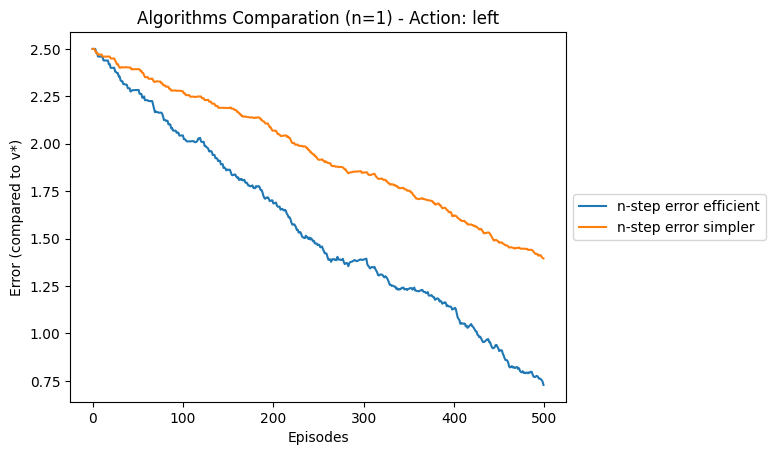

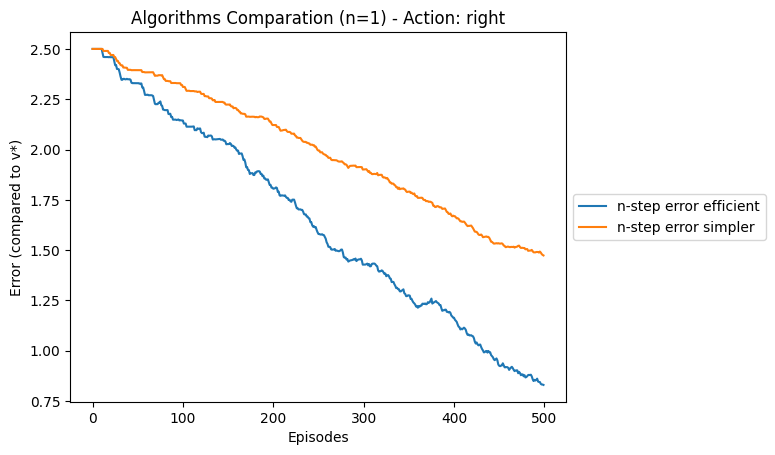

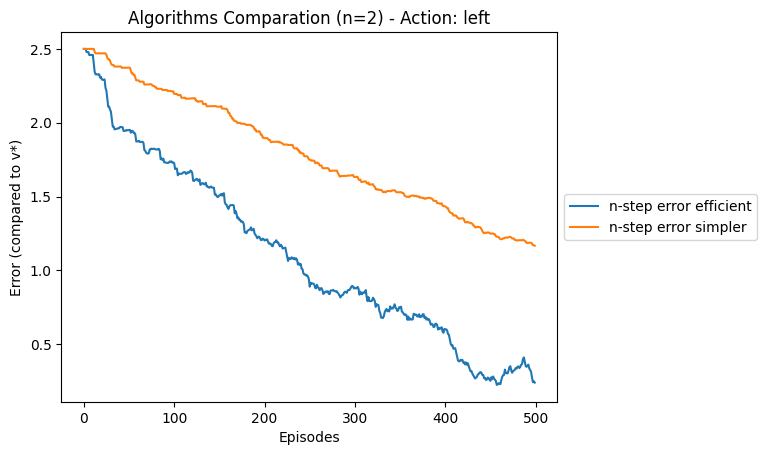

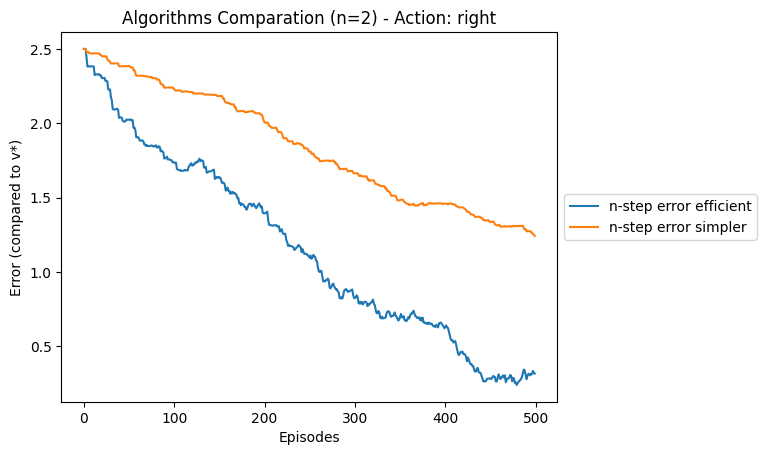

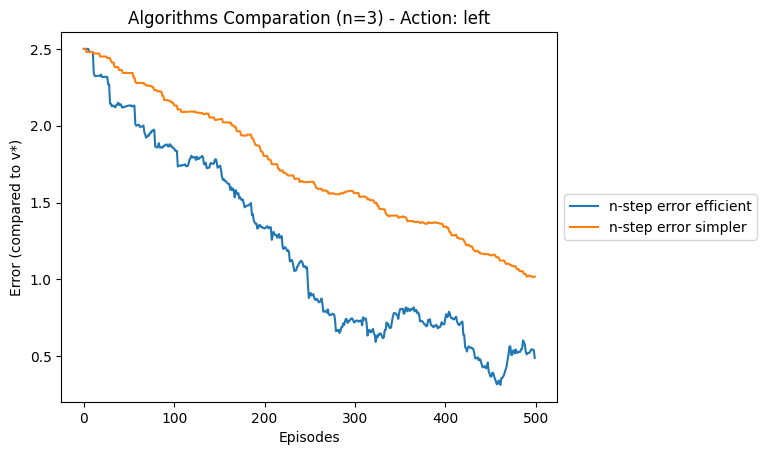

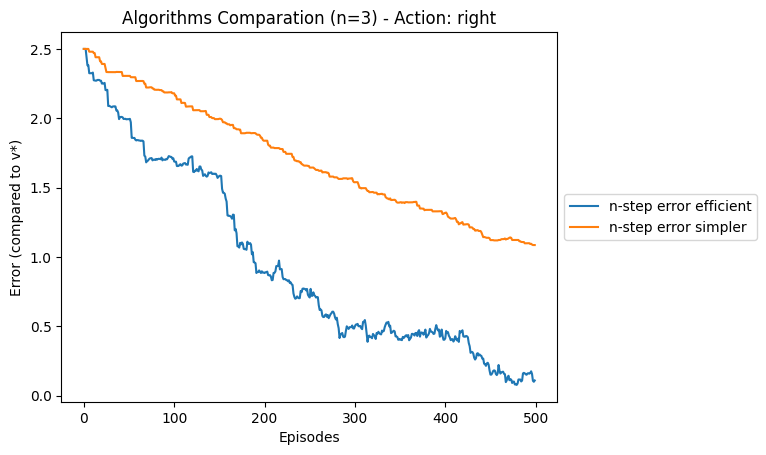

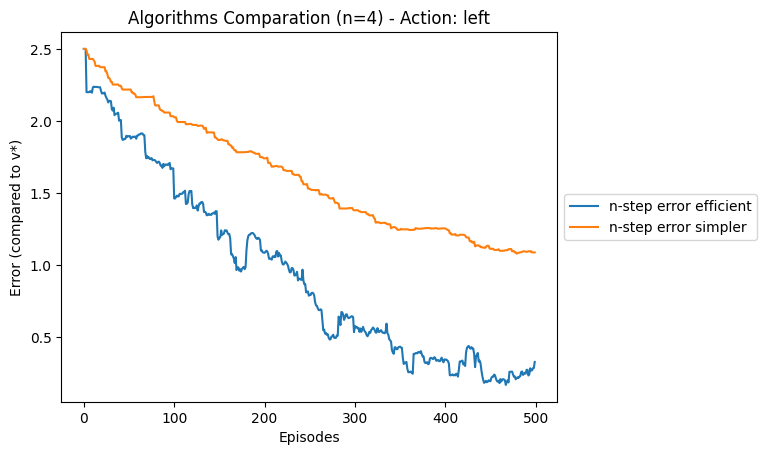

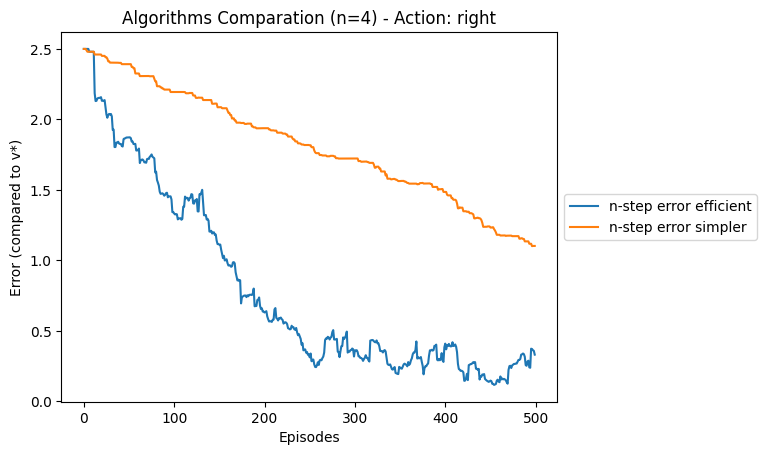

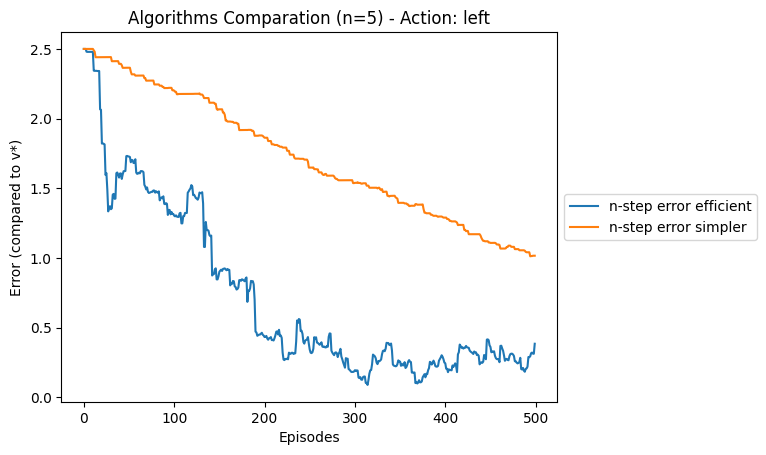

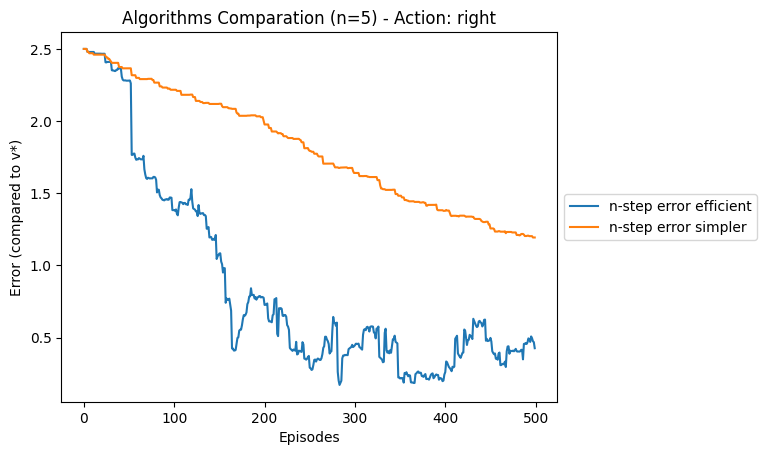

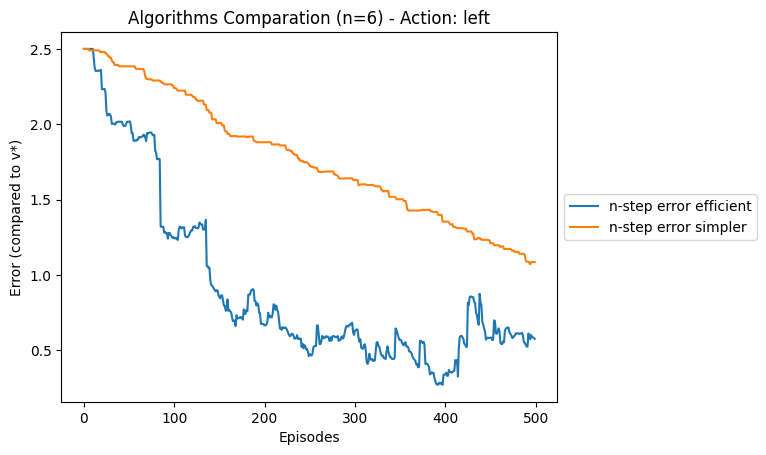

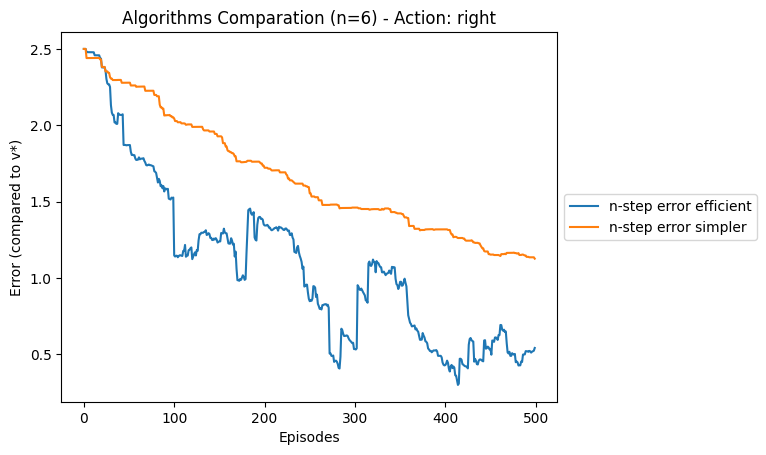

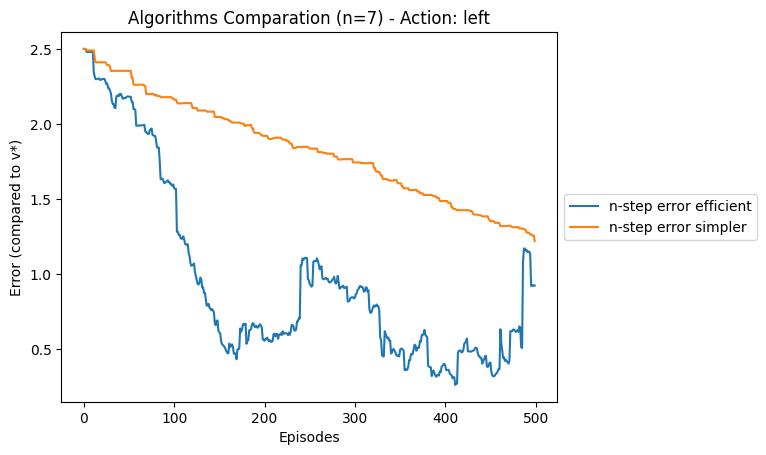

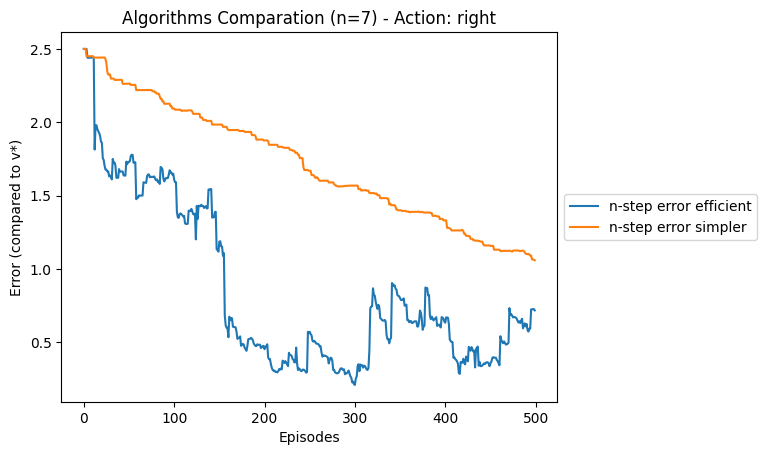

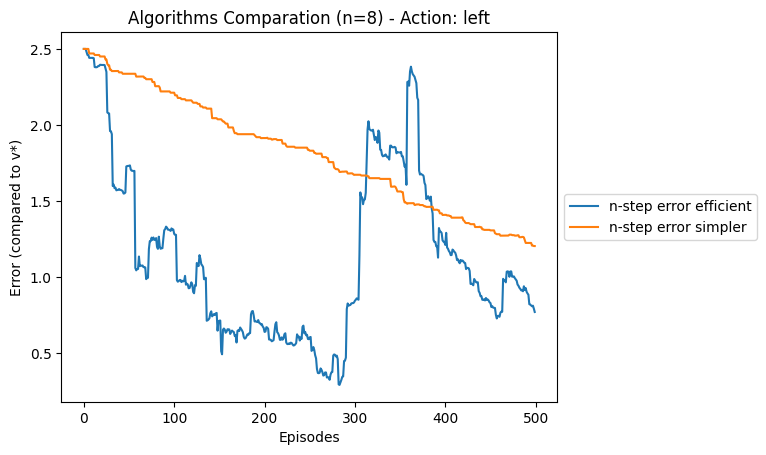

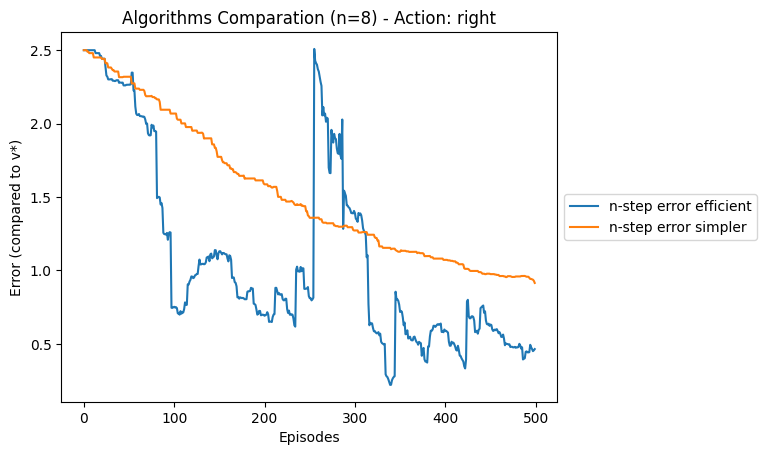

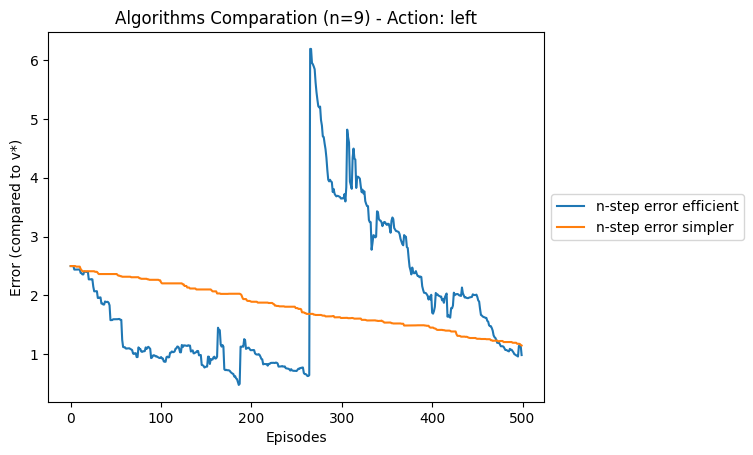

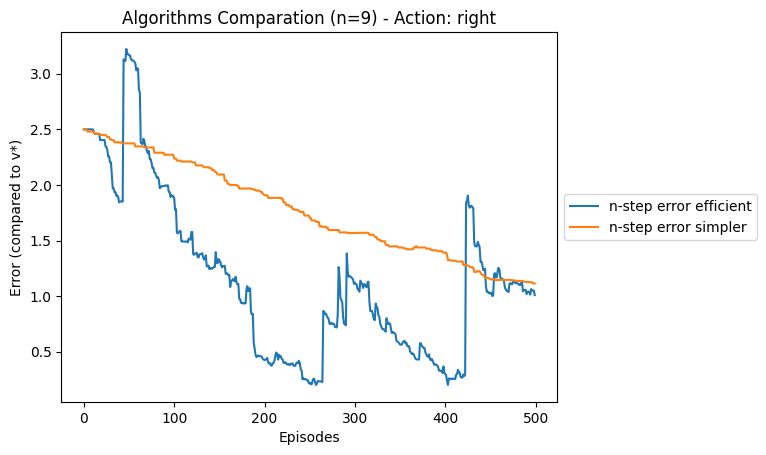

In [27]:
import matplotlib.pyplot as plt

rg = random_generator(seed=42)

def n_step_td_eval_efficient(params: TDEvalParams, tgt_policy_probs: list[list[float]]):
    env = params.env
    v = params.v
    b = params.policy
    n = params.n
    alpha = params.alpha
    gamma = params.gamma
    seed = params.seed

    s_steps = [0] * (n+1)
    a_steps = [0] * (n+1)
    r_steps = [0] * (n+1)

    state = env.reset(seed)
    s_steps[0] = state
    T: int | None = None
    t = 0
    tau: int | None = None
    b_prob = 0.5

    while T is None or tau is None or tau < T-1:
        if T is None or t < T:
            action = b(state)
            a_steps[t % (n+1)] = action
            next_state, reward, terminated, truncated = env.step(action)
            r_steps[(t+1) % (n+1)] = reward
            s_steps[(t+1) % (n+1)] = next_state
            done = terminated or truncated
            if done:
                T = t + 1
            state = next_state

        tau = t - n + 1
        t += 1

        if tau >= 0:
            tt = T if T is not None else t + 1
            k = min(t, tt) - 1
            G = v[s_steps[(k+1) % (n+1)]]
            while k >= tau:
                rho = tgt_policy_probs[s_steps[k % (n+1)]][a_steps[k % (n+1)]]/b_prob
                G = rho * (r_steps[(k+1) % (n+1)] + gamma * G) + (1 - rho) * v[s_steps[k % (n+1)]]
                k -= 1
            error = G - v[s_steps[tau % (n+1)]]
            v[s_steps[tau % (n+1)]] += alpha * error

    return v

def n_step_td_eval_simpler(params: TDEvalParams, tgt_policy_probs: list[list[float]]):
    env = params.env
    v = params.v
    b = params.policy
    n = params.n
    alpha = params.alpha
    gamma = params.gamma
    seed = params.seed

    s_steps = [0] * (n+1)
    a_steps = [0] * (n+1)
    r_steps = [0] * (n+1)

    state = env.reset(seed)
    s_steps[0] = state
    T: int | None = None
    t = 0
    tau: int | None = None
    b_prob = 1.0/env.num_actions

    while T is None or tau is None or tau < T-1:
        if T is None or t < T:
            action = b(state)
            a_steps[t % (n+1)] = action
            next_state, reward, terminated, truncated = env.step(action)
            r_steps[(t+1) % (n+1)] = reward
            s_steps[(t+1) % (n+1)] = next_state
            done = terminated or truncated
            if done:
                T = t + 1
            state = next_state

        tau = t - n + 1
        t += 1

        if tau >= 0:
            tt = T if T is not None else t + 1
            G = sum([(gamma**(k - tau))*r_steps[(k+1) % (n+1)] for k in range(tau, min(t, tt))])
            if t < tt:
                G += gamma**(t-tau)*v[s_steps[t % (n+1)]]
            rho = 1
            for k in range(tau, min(t, tt)):
                rho *= tgt_policy_probs[s_steps[k % (n+1)]][a_steps[k % (n+1)]]/b_prob
            error = G - v[s_steps[tau % (n+1)]]
            v[s_steps[tau % (n+1)]] += alpha * rho * error

    return v

env = RandomWalkEnv(max_steps=1000, with_actions=True)

for n in range(1, 10):
    for action in [0, 1]:
        tgt_policy_probs = [[int(action == 0), int(action == 1)] for _ in range(env.num_states)]
        evaluate_random_walk(
            title='Action: ' + ('left' if action == 0 else 'right'),
            n=n,
            policy=lambda state: int(rg.choice([0, 1])),
            cases=[
            ('efficient', lambda params: n_step_td_eval_efficient(params, tgt_policy_probs)),
            ('simpler', lambda params: n_step_td_eval_simpler(params, tgt_policy_probs)),
        ])

As can be seen in the graphs, the efficient algorithm reduces the error faster, although it has a higher variance, especially with higher values of n.